# EDA on PSAT10 vs SAT demographic predictors of SAT scores

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Import data & drop nuissance columns
multi_cats = pd.read_csv('../data/SAT_2018_multicategories.csv').drop(['Unnamed: 0'], axis=1, errors='ignore')
psat_sat = pd.read_csv('../data/SAT_PSAT_aggregated.csv').drop(['Unnamed: 0'], axis=1, errors='ignore')



In [3]:
# Fix dtypes after data import
psat_sat = psat_sat.astype({'District Number': 'str',
                 'District Name': 'str',
                 'School Number': 'str',
                 'School Name': 'str',
                 '2018 EBRW Mean SAT': 'float64',
                 '2018 Math Mean SAT': 'float64',
                 '2018 Overall Mean Score SAT': 'float64',
                 '2017 EBRW Mean PSAT10': 'float64',
                 '2017 Math Mean PSAT10': 'float64',
                 '2017 Overall Mean Score PSAT10': 'float64',
                 'Zip Code': 'str',
                 'Median Family Income': 'float64',
                 'Population': 'float64'})

psat_sat['Zip Code'] = psat_sat['Zip Code'].str.strip('.0')


multi_cats = multi_cats.astype({'District Number': 'str',
                                 'School Number': 'str',
                                 'Zip Code': 'str'})

multi_cats['Zip Code'] = multi_cats['Zip Code'].str.strip('.0')

Unused code for unused dataset

Single category aggregated data not used
single_cats = pd.read_csv('../data/SAT_2018_single_categories.csv').drop(['Unnamed: 0'], axis=1, errors='ignore')

single_cats = single_cats.astype({'District Number': 'str',
                                 'School Number': 'str',
                                 '2018 EBRW': 'float64',
                                 '2018 Math': 'float64',
                                 '2018 Overall': 'float64',
                                 'Zip Code': 'str',
                                 'Median Family Income': 'float64',
                                 'Population': 'float64'})

single_cats['Zip Code'] = single_cats['Zip Code'].str.strip('.0')

## Aggregated 2017 PSAT & 2018 SAT data

In [4]:
psat_sat.head()

,District Number,District Name,School Number,School Name,2018 EBRW Mean SAT,2018 Math Mean SAT,2018 Overall Mean Score SAT,2017 EBRW Mean PSAT10,2017 Math Mean PSAT10,2017 Overall Mean Score PSAT10,Zip Code,Median Family Income,Population
0,10,mapleton 1,187,mapleton expeditionary school of the arts,472.0,467.0,939.0,412.0,430.0,842.0,80299,NaN,NaN
1,10,mapleton 1,212,mapleton early college high school,464.0,441.0,905.0,409.0,409.0,818.0,80229,54249.0,51224.0
2,10,mapleton 1,263,global leadership academy,443.0,438.0,880.0,410.0,404.0,814.0,80221,51699.0,40341.0
3,10,mapleton 1,309,academy high school,452.0,434.0,886.0,411.0,417.0,828.0,80229,54249.0,51224.0
4,10,mapleton 1,503,york international,495.0,477.0,972.0,466.0,444.0,910.0,80229,54249.0,51224.0


In [5]:
# Drop categorical data for now
# Also drop overall scores since demographic dataset only has separated Math and EBRW scores
ps_scores_only = psat_sat[['2018 EBRW Mean SAT', '2018 Math Mean SAT',
        '2017 EBRW Mean PSAT10',
       '2017 Math Mean PSAT10', 'Median Family Income']]

In [6]:
ps_scores_only.describe()

,2018 EBRW Mean SAT,2018 Math Mean SAT,2017 EBRW Mean PSAT10,2017 Math Mean PSAT10,Median Family Income
count,335.000000,335.000000,335.000000,335.000000,325.000000
mean,502.737313,487.289552,467.665672,457.331343,72287.612308
std,52.339200,53.615478,47.002502,41.486388,23699.204868
min,388.000000,377.000000,364.000000,370.000000,36948.000000
25%,467.000000,451.000000,437.000000,428.000000,52584.000000
50%,502.000000,484.000000,469.000000,454.000000,68889.000000
75%,538.000000,521.000000,499.000000,481.500000,86082.000000
max,659.000000,663.000000,598.000000,594.000000,155777.000000


<Figure size 2880x1440 with 0 Axes>

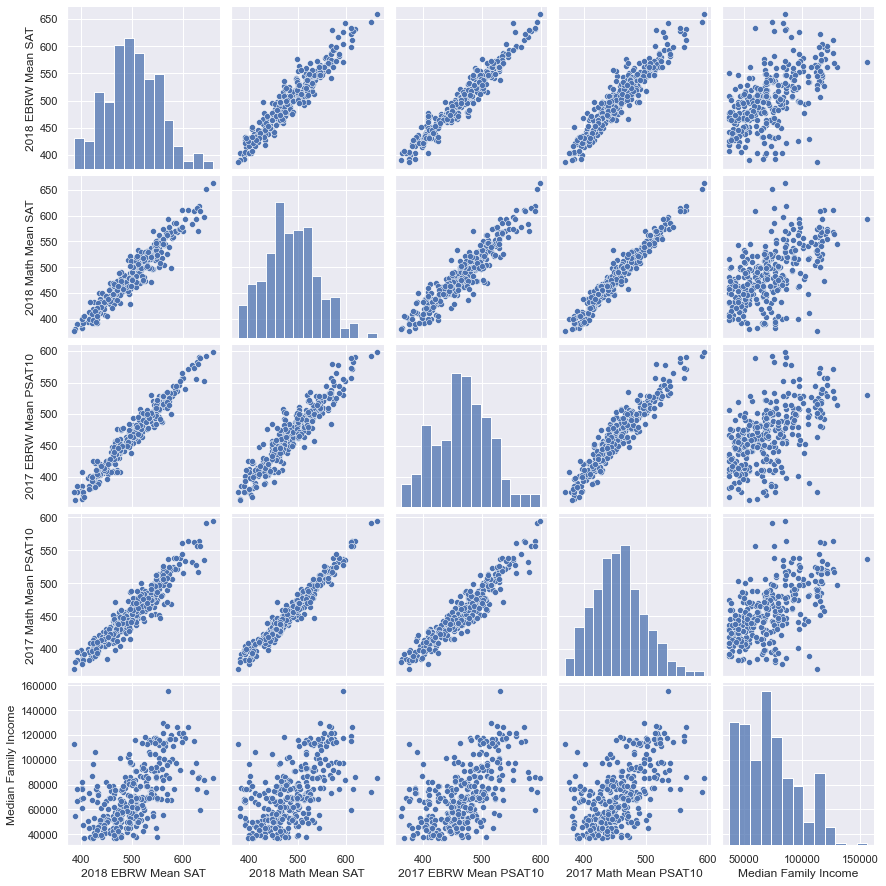

In [7]:
sns.set(font_scale=1)
plt.figure(figsize=(40,20))
sns.pairplot(ps_scores_only)
plt.show()

**Note:** 
* Score histograms for each test indicate possible normal distribution.
* Relationship implied between test scores & median family income

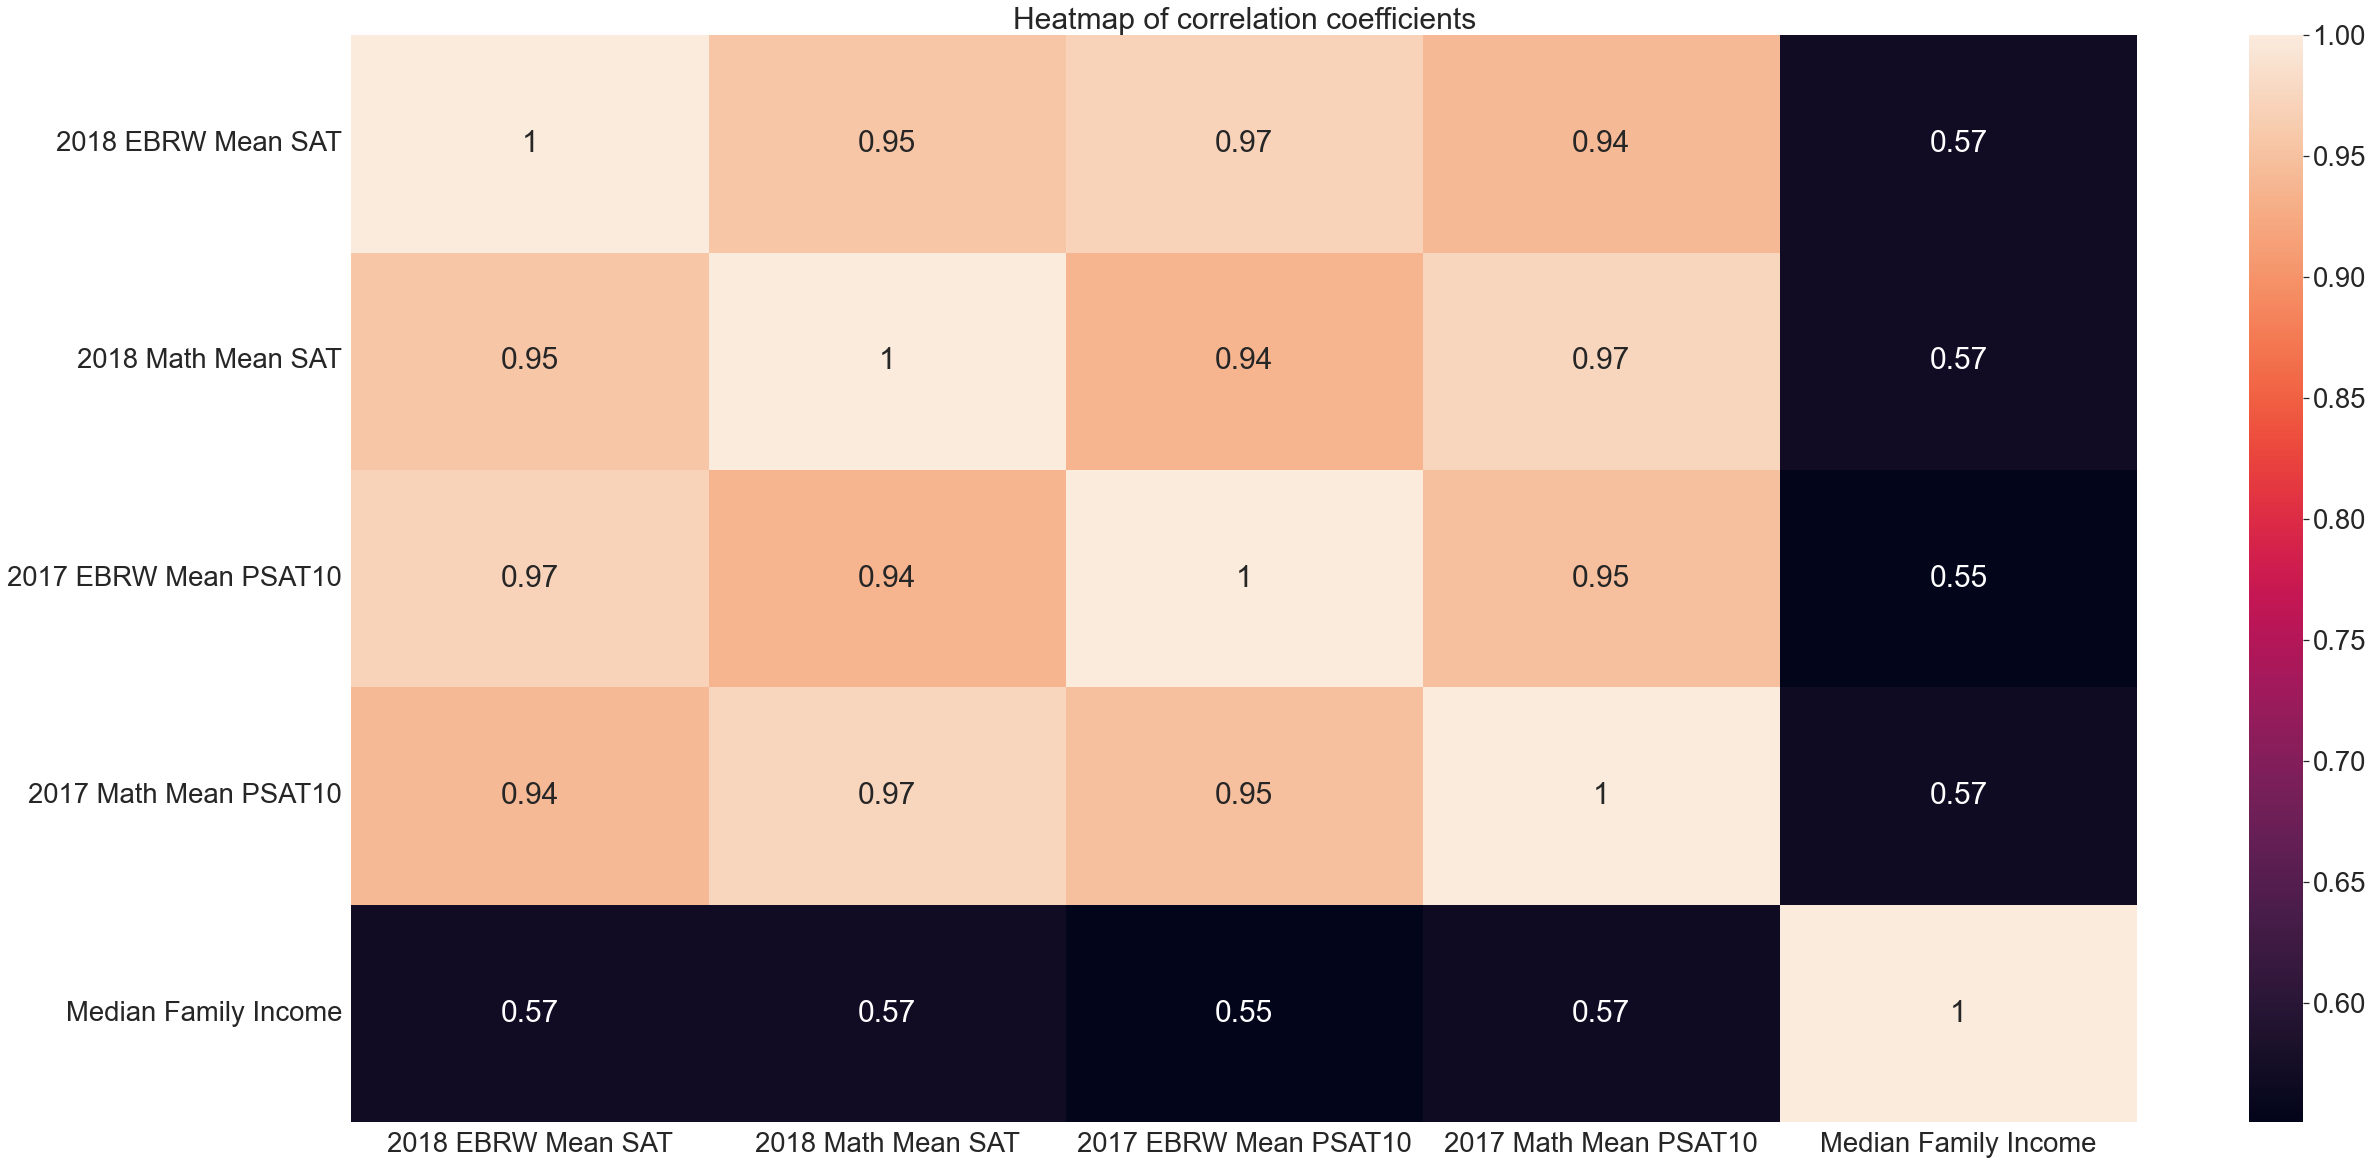

In [8]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,20))
plt.title('Heatmap of correlation coefficients')
sns.heatmap(ps_scores_only.corr(), annot=True)
plt.show()

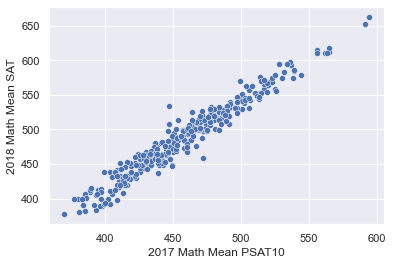

In [9]:
sns.set(font_scale=1)
sns.scatterplot(x='2017 Math Mean PSAT10', y='2018 Math Mean SAT', data=ps_scores_only)
plt.show()

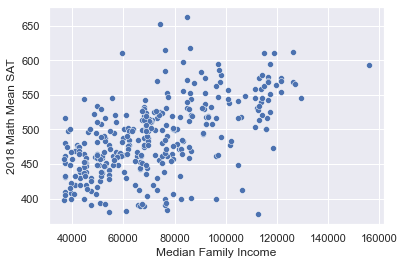

In [10]:
sns.set(font_scale=1)
sns.scatterplot(x='Median Family Income', y='2018 Math Mean SAT', data=ps_scores_only)
plt.show()

**Note:** 
* High correlation between PSAT and SAT scores.  Implies that PSAT scores are good predictor of SAT scores.
* High correlation between different tests for each  year.  High math score $\Longleftrightarrow $ high EBRW score.
* Significant correlation between median family income & test scores.

## Demographic categorized data

In [11]:
# Drop school & district categories for now.
mc_scores = multi_cats[['Mean Score Math', 'Mean Score EBRW','Gend', 'Ethn', 'FRL', 'ELL', 'IEP', 
        'Median Family Income']]

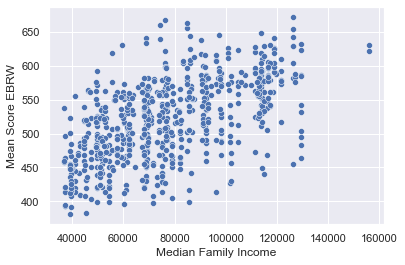

<Figure size 432x288 with 0 Axes>

In [12]:
sns.set(font_scale=1)
sns.scatterplot(x='Median Family Income',y='Mean Score EBRW', data=mc_scores)
plt.figure()
plt.show()

Demographic disaggregated data also implies correlation between MFE and SAT scores, supporting correlation in aggregated data. Clustering & duplicates of MFE here is from multiple entries for many schools since those schools have multiple demographic groups' scores in the data.

In [13]:
# One-hot encode categorical variables

col_to_onehotenc = ['Gend', 'Ethn', 'FRL', 'ELL', 'IEP']

encoder = OneHotEncoder(handle_unknown='ignore')
mc_onehot = mc_scores
for col in col_to_onehotenc:
    encoder_df = pd.DataFrame(encoder.fit_transform(mc_scores[[col]]).toarray())
    encoder_df.columns=encoder.get_feature_names_out()
    mc_onehot = mc_onehot.join(encoder_df)
    mc_onehot = mc_onehot.drop(columns=col)

In [14]:
mc_onehot.head()

,Mean Score Math,Mean Score EBRW,Median Family Income,Gend_Female,Gend_Male,Ethn_Asian,Ethn_Black,Ethn_Hispanic,Ethn_Two or More Races,Ethn_White,FRL_FRL Eligible,FRL_Not FRL Eligible,ELL_English Learners,ELL_Not English Learners,IEP_Students with IEPs,IEP_Students without IEPs
0,505.882353,560.588235,118620.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,537.757009,562.056075,68454.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,574.725275,564.395604,68454.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,503.529412,517.058824,121412.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,560.444444,579.222222,121412.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [15]:
mc_onehot.describe()

,Mean Score Math,Mean Score EBRW,Median Family Income,Gend_Female,Gend_Male,Ethn_Asian,Ethn_Black,Ethn_Hispanic,Ethn_Two or More Races,Ethn_White,FRL_FRL Eligible,FRL_Not FRL Eligible,ELL_English Learners,ELL_Not English Learners,IEP_Students with IEPs,IEP_Students without IEPs
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,508.242801,519.863670,77404.277299,0.518678,0.481322,0.014368,0.022989,0.416667,0.011494,0.534483,0.340517,0.659483,0.112069,0.887931,0.005747,0.994253
std,61.648638,59.295776,24918.192458,0.500010,0.500010,0.119087,0.149975,0.493361,0.106670,0.499168,0.474224,0.474224,0.315678,0.315678,0.075646,0.075646
min,358.823529,380.625000,36948.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,463.057692,474.843750,57628.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,510.000000,522.693383,74576.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,551.418300,562.958333,93024.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,688.125000,672.352941,155777.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Note:**  

Mean scores between aggregated and disaggregated data do not match.  This was expected because disaggregated data did not include scores if the number of student in a given category was less than 17.  Aggregated data includes scores for all students in each school.

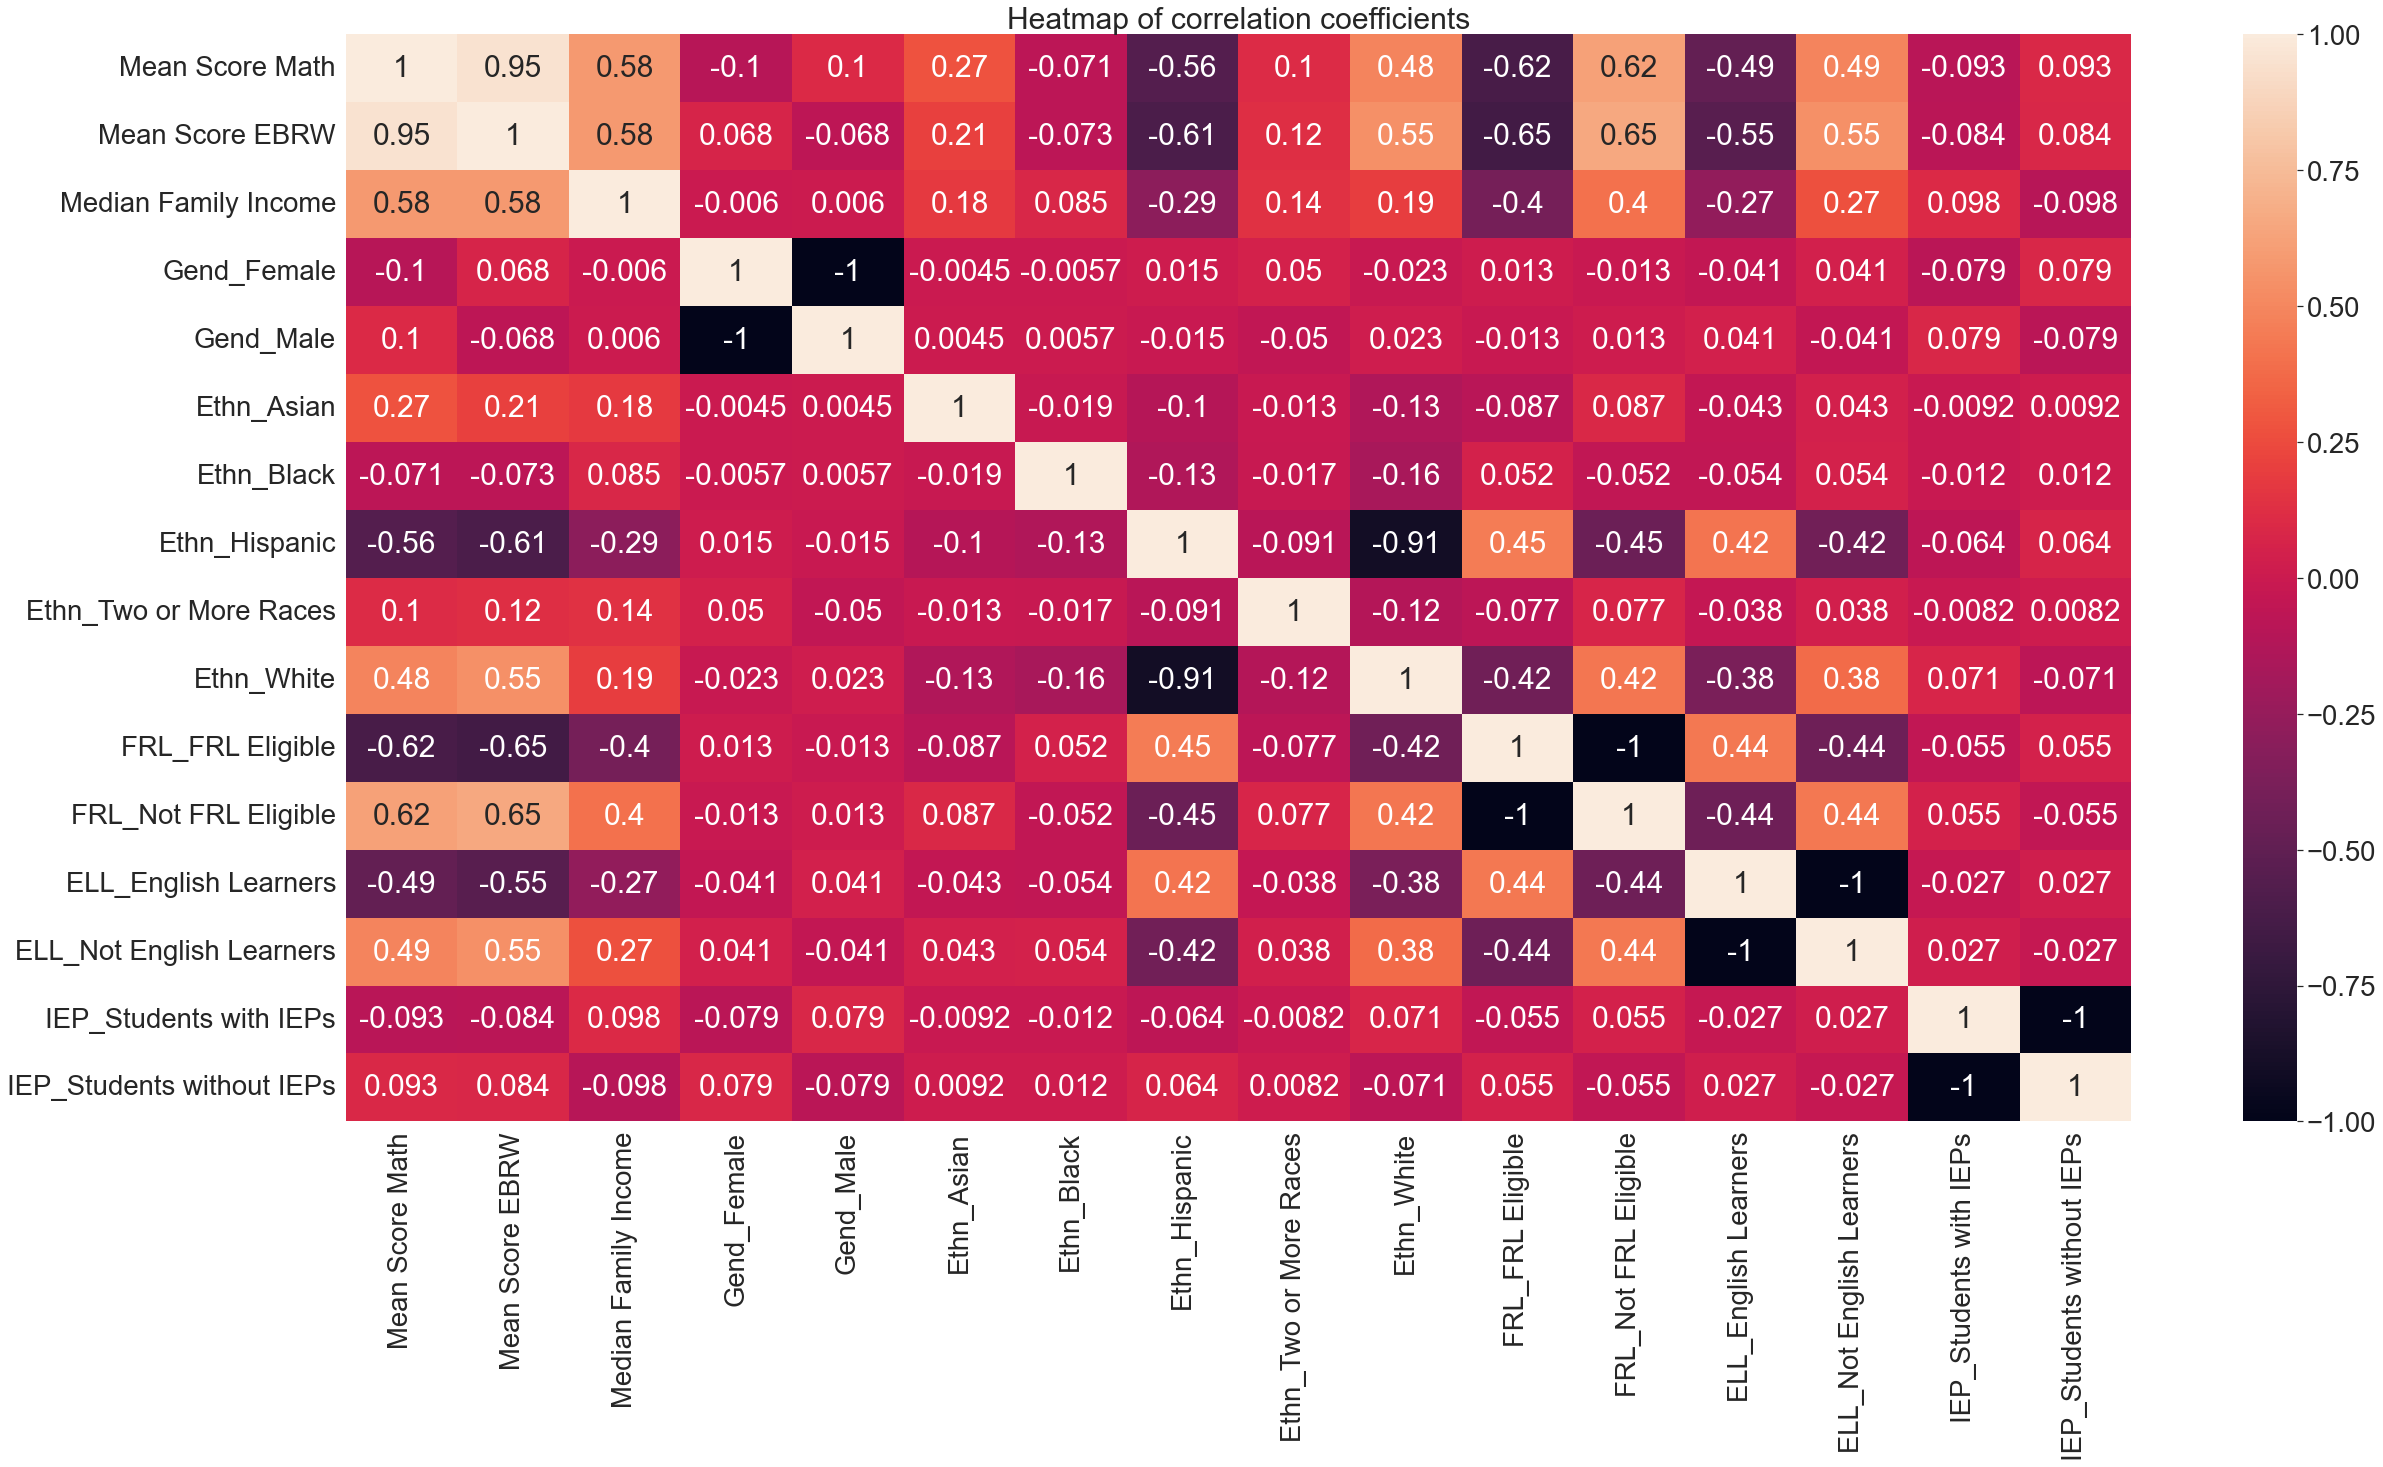

In [16]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,20))
plt.title('Heatmap of correlation coefficients')

sns.heatmap(mc_onehot.corr(), annot=True)
plt.show()

Only first two columns (or first two rows) involve the target features.

**Noteworthy characteristics:**

* EBRW & Math mean scores (student scores for those subjects) are highly correlated.  High EBRW score $\Longleftrightarrow  $ high math score.

* Most important features in descending order:
    * Free or reduced lunch (FRL)
    * Median family income (MFE)
    * Ethnicity (Hispanic)
    * Engligh language learner (ELL) status
    * Ethnicity (white)
    
* Significant segregation between white & hispanic students may be implied by -0.91 correlation between those two groups.
* Expected inverse correlation between FRL and MFE is observed.  Higher median income $\Longleftrightarrow  $ fewer students qualifying for FRL.

In [17]:
# Get total for each category.
mc_onehot.drop(['Mean Score Math', 'Mean Score EBRW', 'Median Family Income'], axis=1).sum()

Gend_Female                  361.0
Gend_Male                    335.0
Ethn_Asian                    10.0
Ethn_Black                    16.0
Ethn_Hispanic                290.0
Ethn_Two or More Races         8.0
Ethn_White                   372.0
FRL_FRL Eligible             237.0
FRL_Not FRL Eligible         459.0
ELL_English Learners          78.0
ELL_Not English Learners     618.0
IEP_Students with IEPs         4.0
IEP_Students without IEPs    692.0
dtype: float64

**Noteworthy characteristics:**

* Few groups of students with IEPs, may not be enough for statistical significance.  However these are groups of students, not individuals.  Scores were only reported if there were at least 16 students for each group.  This may not matter since IEP status had a very low correlation coefficient.

In [18]:
mc_onehot

,Mean Score Math,Mean Score EBRW,Median Family Income,Gend_Female,Gend_Male,Ethn_Asian,Ethn_Black,Ethn_Hispanic,Ethn_Two or More Races,Ethn_White,FRL_FRL Eligible,FRL_Not FRL Eligible,ELL_English Learners,ELL_Not English Learners,IEP_Students with IEPs,IEP_Students without IEPs
0,505.882353,560.588235,118620.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,537.757009,562.056075,68454.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,574.725275,564.395604,68454.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,503.529412,517.058824,121412.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,560.444444,579.222222,121412.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,528.421053,582.105263,93024.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
692,533.100775,543.798450,93024.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
693,510.476190,521.428571,93024.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
694,505.000000,517.222222,93024.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [19]:
mc_onehot.to_csv('../data/demographic_scores_onehot.csv')

# Major takeaways from initial EDA

* PSAT10 scores in 2017 are highly correlated with SAT scores in 2018.  Correlation coefficient 0.97 for both EBRW and Math scores.
* There are 5 demographic variables which each have a magnitude greater than 0.5 with SAT scores in 2018.

**The big question** is whether the most significant demographic variables collectively outweigh the correlation between PSAT and SAT scores.

It is important to note that the same demographic variables impact PSAT and SAT scores in the same way.  The question here involves a veil of ignorance.  If we *only* know the PSAT scores will that be a better predictor than if we *only* know the demographic variables?